In [2]:
# !pip -q install python-crfsuite
# !pip -q install category_encoders
# !pip -q install flair
# import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('words')
# !pip -q install plotly 
# !pip -q install seaborn
# !pip -q install chart_studio
# # !pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

In [13]:
import pandas as pd
import numpy as np
import re
import collections, itertools
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [4]:
df = pd.read_csv("../data/test.csv",names=['text','character','gender'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 3 columns):
text         1120 non-null object
character    1124 non-null object
gender       1124 non-null object
dtypes: object(3)
memory usage: 26.5+ KB


In [6]:
df.describe()

,text,character,gender
count,1120,1124,1124
unique,1097,18,2
top,What?,TANYA,male
freq,10,124,598


In [7]:
df['text_len'] = df.apply(lambda x: len(str(x.text).split()),axis = 1)

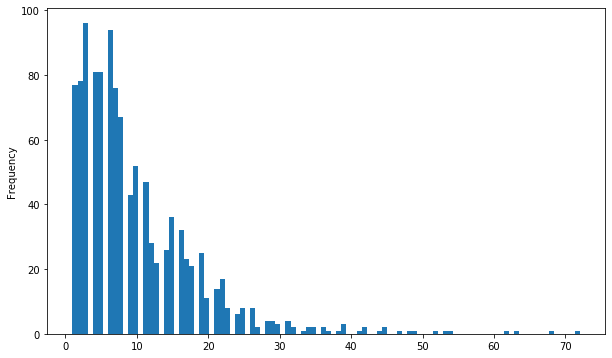

In [8]:
df['text_len'].plot(
    kind='hist',
    bins=100)

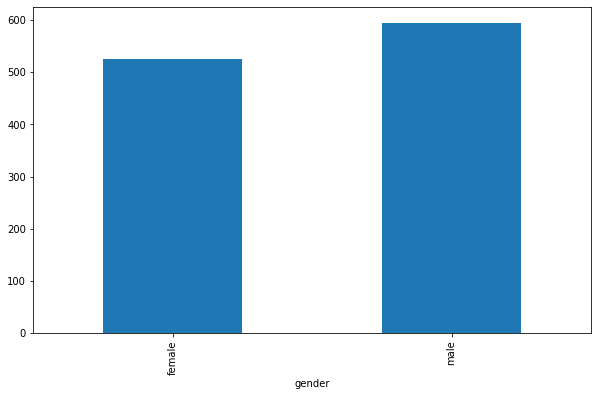

In [9]:
df.groupby('gender')['text'].count().plot(kind='bar')

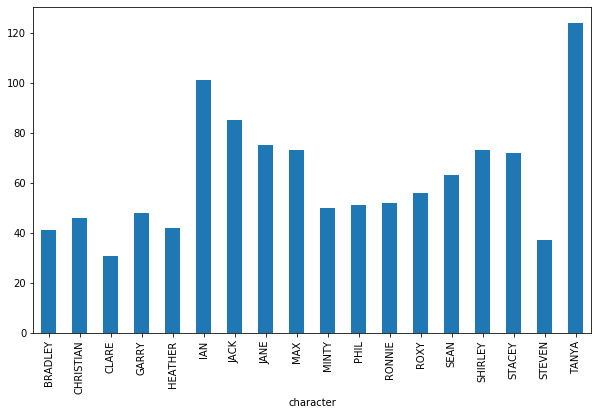

In [10]:
df.groupby('character')['text'].count().plot(kind='bar')

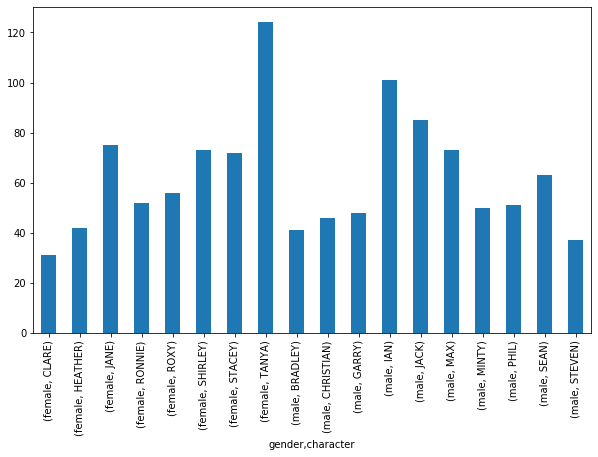

In [11]:
df.groupby(['gender','character'])['text'].count().plot(kind='bar')

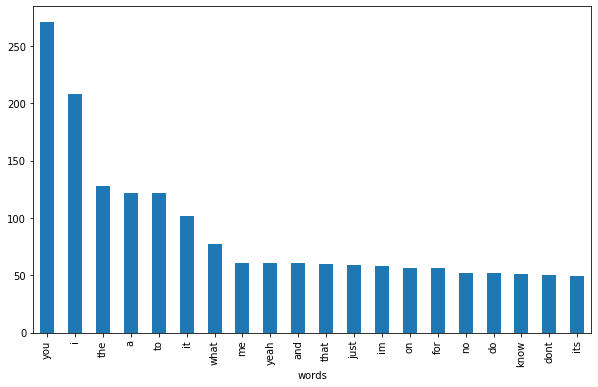

In [14]:
total_words = list(itertools.chain(*[nltk.wordpunct_tokenize(re.sub(r'[^\w\s]','',str(i).lower())) for i in df[df['gender']=='male'].text.values.tolist()]))

count_vector = collections.Counter(total_words)
df1 = pd.DataFrame(count_vector.most_common(20),columns=['words','frequency'])
df1.groupby('words').sum()['frequency'].sort_values(ascending=False).plot(kind='bar')

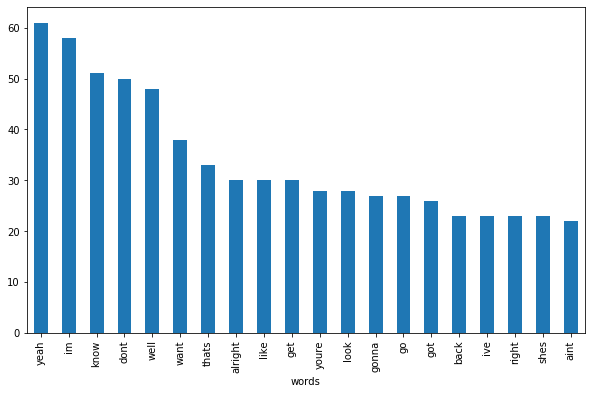

In [15]:
total_words = list(itertools.chain(*[nltk.wordpunct_tokenize(re.sub(r'[^\w\s]','',str(i).lower())) for i in df[df['gender']=='male'].text.values.tolist()]))
total_words = [w for w in total_words if w not in stopwords ]

count_vector = collections.Counter(total_words)
df1 = pd.DataFrame(count_vector.most_common(20),columns=['words','frequency'])
df1.groupby('words').sum()['frequency'].sort_values(ascending=False).plot(kind='bar')